# 矩阵和张量
$$\LaTeX$$

In [2]:
import numpy as np
import scipy
import sympy as sym
import matplotlib
import sklearn
sym.init_printing()

print("NumPy version:", np.__version__)
print("SciPy version:", scipy.__version__)
print("SymPy version:", sym.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("SkLearn version:", sklearn.__version__)

NumPy version: 1.16.2
SciPy version: 1.2.1
SymPy version: 1.3
Matplotlib version: 3.0.3
SkLearn version: 0.20.3


## 符号说明

以下是要使用符号:

符号$A \in R^{m×n}$表示一个m行n列的矩阵，并且矩阵A中的所有元素都是实数, 可以写作$A_{mn}$。
符号$x \in R^n$表示一个含有n个元素的向量。通常，我们把n维向量看成是一个n行1列矩阵，即列向量。如果我们想表示一个行向量（1行n列矩阵），我们通常写作$x^T$ (xT表示x的转置，后面会解释它的定义)。
一个向量x的第i个元素表示为{x_i}：

我们用$a_{ij}$ (或$A_{ij}$) 表示第i行第j列的元素：

## 矩阵基础运算

In [23]:
x_11,x_12,x_13 = sym.var('x_11 x_12 x_13')
x_21,x_22,x_23 = sym.var('x_21 x_22 x_23')
x_31,x_32,x_33 = sym.var('x_31 x_32 x_33')
M = sym.Matrix([[x_11,x_12,x_13],[x_21,x_22,x_23],[x_31,x_32,x_33]])
M

⎡x₁₁  x₁₂  x₁₃⎤
⎢             ⎥
⎢x₂₁  x₂₂  x₂₃⎥
⎢             ⎥
⎣x₃₁  x₃₂  x₃₃⎦

In [40]:
v_1, v_2, v_3 = sym.var('v_1, v_2, v_3')
V = sym.Matrix([[v_1],[v_2],[v_3]])
M.dot(V)

### 矩阵运算性质
- 结合律即(AB)C = A(BC)
- 分配率即A(B + C) = AB + AC
- **矩阵乘法没有交换律**，即AB ≠BA.

结合律

In [2]:
An=np.array([[1,1],[2,1]])
Bn=np.array([[2,2],[3,2]])
Cn=np.array([[3,3],[4,3]])

In [3]:
An * Bn

array([[2, 2],
       [6, 2]])

In [10]:
np.dot(np.dot(An,Bn),Cn)

array([[31, 27],
       [45, 39]])

In [11]:
np.dot(An,np.dot(Bn,Cn))

array([[31, 27],
       [45, 39]])

In [12]:
np.dot(np.dot(Cn,Bn),An)

array([[39, 27],
       [45, 31]])

分配律

In [13]:
An=np.array([[1,1],[2,1]])
Bn=np.array([[2,2],[3,2]])
Cn=np.array([[3,3],[4,3]])

In [14]:
np.dot(An,(Bn+Cn))

array([[12, 10],
       [17, 15]])

In [15]:
np.dot(An,Bn)+np.dot(An,Cn)

array([[12, 10],
       [17, 15]])

In [16]:
np.dot((Bn+Cn),An)

array([[15, 10],
       [17, 12]])

## 公式推导工具
约定求和，用于张量运算

$$
A=a_{ij}e^i e^j\\
B=B_{km}e^k e^m\\
e^i\cdot e^j=\delta_{ij}\\
a_{ij} \delta_{ij}=a_{ii}
$$

$$
A\cdot B\\
\sum_k {a_{ik}b_{kj}} \triangleq a_{ik}b_{kj}
$$

$$
A\cdot B \cdot C=a_{ij} b_{jk} c_{km} e^i e^m
$$

## 单位矩阵对角矩阵

$$
I\cdot A = A\cdot I\\
I=\delta_{ij}
$$

In [21]:
E=sym.eye(3)
E

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

In [24]:
M*E

⎡x₁₁  x₁₂  x₁₃⎤
⎢             ⎥
⎢x₂₁  x₂₂  x₂₃⎥
⎢             ⎥
⎣x₃₁  x₃₂  x₃₃⎦

In [28]:
E[1,2]=1
E[1,0]=0
E*M

⎡   x₁₁        x₁₂        x₁₃   ⎤
⎢                               ⎥
⎢x₂₁ + x₃₁  x₂₂ + x₃₂  x₂₃ + x₃₃⎥
⎢                               ⎥
⎣   x₃₁        x₃₂        x₃₃   ⎦

## 矩阵转置

$$
A=a_{ij}\\
A^T=a_{ji}
$$

In [34]:
An=np.array([[1,1],[2,1]])
Bn=np.array([[2,2],[3,2]])
Cn=np.array([[3,3],[4,3]])
An

array([[1, 1],
       [2, 1]])

In [33]:
np.transpose(An)

array([[1, 2],
       [1, 1]])

In [35]:
np.dot(An, Bn)

array([[5, 4],
       [7, 6]])

In [36]:
np.dot(np.transpose(Bn), np.transpose(An))

array([[5, 7],
       [4, 6]])

In [37]:
np.dot(Bn, An)

array([[6, 4],
       [7, 5]])

## 对称矩阵

$$
A^T=A
$$

In [38]:
A1=(An+np.transpose(An))/2
A2=(An-np.transpose(An))/2

In [39]:
A1

array([[ 1. ,  1.5],
       [ 1.5,  1. ]])

In [40]:
A2

array([[ 0. , -0.5],
       [ 0.5,  0. ]])

## 矩阵迹

$$
tr(A)=a_{ii}
$$

In [41]:
np.trace(np.dot(np.dot(An,Bn),Cn))

70

In [42]:
np.trace(np.dot(np.dot(Cn,Bn),An))

70

In [43]:
np.trace(np.dot(np.dot(Cn,An),Bn))

70

## 范数

$$
||v||^1=\sum_i |x_i|\\
||v||^2=x_i x_i\\
\cdots
$$

## 基变换

## 矩阵逆

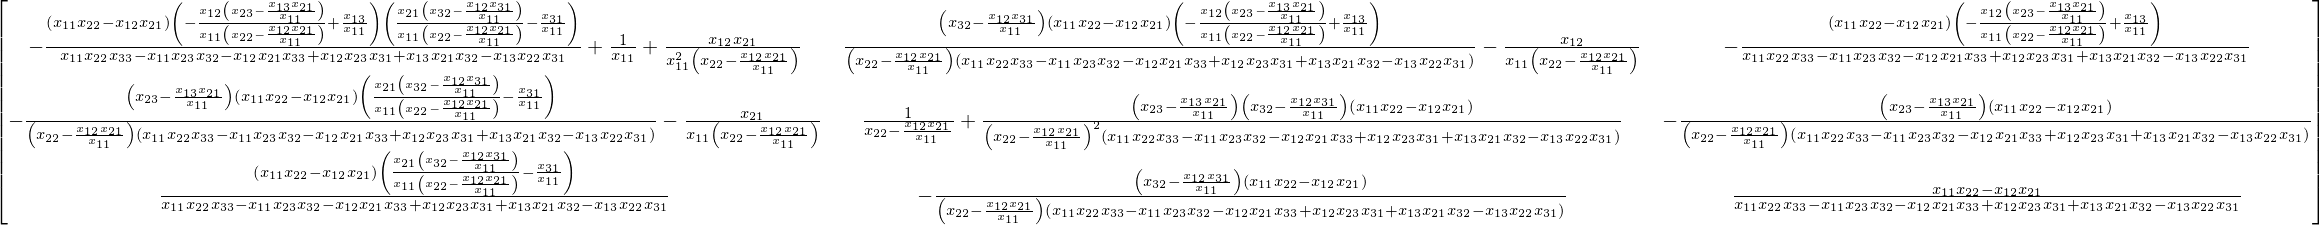

In [42]:
x_11,x_12,x_13 = sym.var('x_11 x_12 x_13')
x_21,x_22,x_23 = sym.var('x_21 x_22 x_23')
x_31,x_32,x_33 = sym.var('x_31 x_32 x_33')
M = sym.Matrix([[x_11,x_12,x_13],[x_21,x_22,x_23],[x_31,x_32,x_33]])
invM=M.inv()
invM

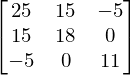

In [43]:
M = sym.Matrix([[25, 15, -5], [15, 18, 0],[-5, 0, 11]])
M

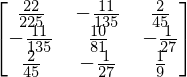

In [44]:
invM=M.inv()
invM

In [45]:
M.dot(invM)

定义方程
$$2x+3y=13\\x+y=5$$
矩阵书写形式：
$$A\cdot x = b$$
求解可得：
$$x=A^{-1}\cdot b$$

In [122]:
M=sym.Matrix([[2,3],[1,1]])
invM=M.inv()
b = sym.Matrix([[13],[5]])
invM.dot(b)

## 矩阵分解

## LU分解
求解方程：
$$A\cdot x=b$$
的过程中需要对其进行初等变换：
$$RA=\begin{bmatrix} 1&\cdots&0\\ \vdots&\ddots&\vdots \\r&\cdots&1 \end{bmatrix}\cdot A=U$$
$$U=\begin{bmatrix} u_{11}&\cdots&u_{nn}\\ \vdots&\ddots&\vdots \\0&\cdots&u_{1n} \end{bmatrix}$$

$$A=LU$$

In [135]:
L, U, T = M.LUdecomposition()

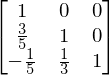

In [136]:
L

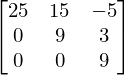

In [137]:
U

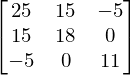

In [138]:
L*U

### QR分解

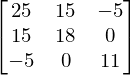

In [132]:
M = sym.Matrix([[25, 15, -5], [15, 18, 0],[-5, 0, 11]])
Q, R = M.QRdecomposition()
M

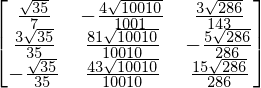

In [127]:
Q

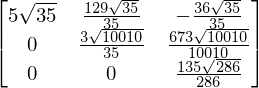

In [128]:
R

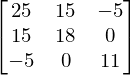

In [129]:
Q*R

**两种分解可以用于求解线性方程组以及求解矩阵的特征值**

## 矩阵特征值分解
$$M=E\Lambda E^{-1}$$

In [3]:
from numpy import linalg as LA
M = np.array([[2.5, 1.5, -0.5], [5.0, 2.0, -1.2],[-5, 0, 11]])
A, E = LA.eig(M)
print(M)

[[ 2.5  1.5 -0.5]
 [ 5.   2.  -1.2]
 [-5.   0.  11. ]]


In [4]:
print(A)

[11.42499752 -0.45414571  4.52914819]


In [5]:
print(E)

[[ 0.0834713   0.47050376  0.48851892]
 [ 0.16931376 -0.85816251  0.78667703]
 [-0.98202107  0.20538579  0.37747652]]


In [7]:
ET=np.transpose(E)
np.dot(ET,E)

array([[ 1.        , -0.30771834, -0.19671733],
       [-0.30771834,  1.        , -0.36771843],
       [-0.19671733, -0.36771843,  1.        ]])

In [8]:
Lambda=np.diag(A)
print(Lambda)
np.dot(E,np.dot(Lambda,ET))

[[11.42499752  0.          0.        ]
 [ 0.         -0.45414571  0.        ]
 [ 0.          0.          4.52914819]]


array([[ 1.05995179,  2.08541908, -0.145205  ],
       [ 2.08541908,  2.79598177, -0.47464548],
       [-0.145205  , -0.47464548, 11.64406644]])

## SVD 分解

$$M = U\Lambda V$$

In [19]:
import numpy as np
M = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
M

array([[-1, -1],
       [-2, -1],
       [-3, -2],
       [ 1,  1],
       [ 2,  1],
       [ 3,  2]])

In [20]:
U, A, V = np.linalg.svd(M, full_matrices=True)

In [23]:
U
print(np.shape(U))
print(np.shape(V))

(6, 6)
(2, 2)


In [24]:
m=np.shape(U)[0]
n=np.shape(V)[0]
mn = np.min([m, n])
Lambda = np.zeros([m, n])
print(m)
Lambda[:mn,:mn] = np.diag(A)
Lambda

6


array([[ 6.30061232,  0.        ],
       [ 0.        ,  0.54980396],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ]])

In [22]:
V

array([[ 0.83849224,  0.54491354],
       [ 0.54491354, -0.83849224]])

In [25]:
np.dot(U, np.dot(Lambda, V))

array([[-1., -1.],
       [-2., -1.],
       [-3., -2.],
       [ 1.,  1.],
       [ 2.,  1.],
       [ 3.,  2.]])

## PCA method

In [38]:
from sklearn.decomposition import PCA
import numpy as np

In [39]:
M = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
pca.fit(M)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [40]:
print(pca.explained_variance_ratio_)

[ 0.99244289  0.00755711]


In [41]:
U, A, V = np.linalg.svd(M, full_matrices=True)
A2=A**2
SA2=np.sum(A2)
print(A2[0]/SA2,A2[1]/SA2)

0.99244289009 0.00755710991019


In [4]:
# PCA计算
import numpy as np
def pca(X):
    m,n = X.shape
    
    # 计算协方差
    C = 1.0/m*X.T.dot(X)
    
    # 特征值赋值给evalues，对应特征向量赋值给evectors
    evalues,evectors = np.linalg.eig(C) 
    
    # 特征值从大到小排列，返回数组索引
    sorted_indices = np.argsort(-evalues)
    
    
    # 特征向量按特征值大小从左到右排列
    sorted_evectors = evectors[:,sorted_indices]
    sorted_evalues = evalues[sorted_indices]
    
    return sorted_evectors,np.diag(sorted_evalues),sorted_evalues

In [5]:
pca(np.array([[1,2],[3,4],[5,6]]))

(array([[-0.61962948, -0.78489445],
        [-0.78489445,  0.61962948]]), array([[ 30.24516497,   0.        ],
        [  0.        ,   0.08816836]]), array([ 30.24516497,   0.08816836]))

In [26]:
import numpy as np

In [27]:
x = np.linspace(0, 2*np.pi, 1000)

In [28]:
v1 = np.sin(x)
v2 = np.sin(2*x)

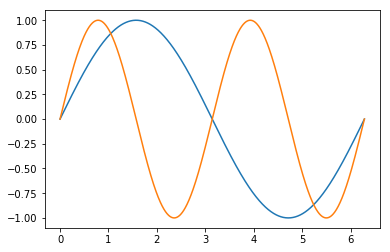

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x, v1)
plt.plot(x, v2)
plt.show()

In [31]:
print(np.sum(v1 * v2))

0.0


In [ ]:
vx = np.random.random(1000)
a1 * v1 + a2*v2+....

## 仿射变换

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib.animation as animation
import numpy as np

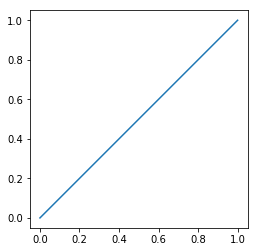

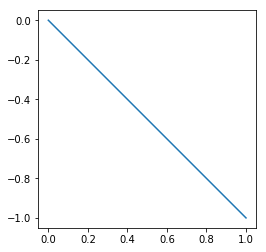

In [10]:
pi=np.pi
theta=pi/2
trans=np.array([[np.cos(theta), np.sin(theta)],[-np.sin(theta),np.cos(theta)]])
array=np.zeros([2,1000])
array[0,:]=np.linspace(0,1,1000)
array[1,:]=np.linspace(0,1,1000)
fig=plt.figure(1)
ax=fig.add_subplot(111)
ax.plot(array[0,:],array[1,:])
ax.set_aspect(1)
array2=trans.dot(array)
fig=plt.figure(2)
ax=fig.add_subplot(111)
ax.plot(array2[0,:],array2[1,:])
ax.set_aspect(1)
plt.show()

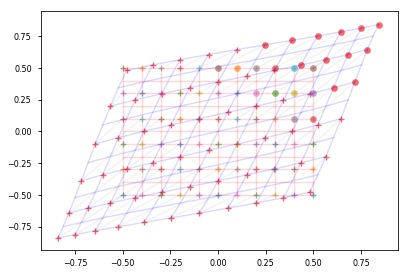

In [11]:

import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib.animation as animation
import numpy as np

mpl.style.use('seaborn-paper')
def linediv(x,y):
    if(x+y<0.5):
        return '+'
    elif(x+y>1.5):
        return '+'
    else:
        return 'o'
line = np.linspace(0,1,101)
tr = np.diag(np.linspace(0,1,11))
matx = np.matmul(tr,np.ones([11,101]))-0.5
maty = np.ones([11,101])*line-0.5
def sigmoid(rt):
    return 1/(1+np.exp(-rt))
def space_tor(xx,yy):
    mx=[]
    my=[]
    for x,y in zip(xx,yy):
        mat=np.array([[1.5,0.5],
                      [0.5,1.5]])
        cst=np.array([0,  0])
        re=np.sin(np.matmul(np.array([x,y]),mat))
        mx.append(re[0])
        my.append(re[1])
    return np.array(mx),np.array(my)

for itr in range(len(matx)):
    xx1,yy1 = space_tor(matx[itr],maty[itr])
    xx2,yy2 = space_tor(maty[itr],matx[itr])
    cont=0
    for x1,x2,x3,x4 in zip(xx1,yy1,matx[itr],maty[itr]):
        if(cont%20==0):
            mk = linediv(x3,x4)
            plt.plot([x1,x3],[x2,x4],alpha=0.05,c='k')
            plt.scatter([x1],[x2],marker=mk,s=40,c='r',alpha=0.6)
            plt.scatter([x3],[x4],marker=mk,s=40,alpha=0.6)
        cont+=1
    xx1,yy1 = space_tor(matx[itr],maty[itr])
    xx2,yy2 = space_tor(maty[itr],matx[itr])
    plt.plot(matx[itr],maty[itr],c='r',alpha=0.15)
    plt.plot(maty[itr],matx[itr],c='r',alpha=0.15)
    plt.plot(xx1,yy1,c='b',alpha=0.15)
    plt.plot(xx2,yy2,c='b',alpha=0.15)
plt.show()        

# 数据压缩

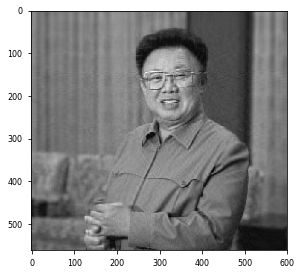

In [12]:
import matplotlib.image as mpimg # mpimg 用于读取图片
import numpy as np 
import matplotlib.pyplot as plt
img = mpimg.imread('img/jin.jpg')
img = img[:, :, :]/255 
# 灰度化
a1, a2, a3 = 0.2989, 0.5870, 0.1140
img_gray = img[:,:,0]*a1+img[:,:,1]*a2+img[:,:,2]*a3 
# 奇异值分解 
from numpy import linalg as LA
M, Q, N = np.linalg.svd(img_gray, full_matrices=True)
Q=np.diag(Q)
re_img=M[:, :50] @ Q[:50, :50] @ N[:50, :]
plt.imshow(np.real(re_img), cmap=plt.get_cmap("gray"))
plt.show()